In [48]:
import pandas as pd
import numpy as np
import requests
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import LabelEncoder

In [2]:
url = "https://www.imdb.com/search/title/?genres=action&sort=user_rating,desc&title_type=feature&num_votes=25000,&pf_rd_m=A2FGELUUNOQJNL&pf_rd_p=f11158cc-b50b-4c4d-b0a2-40b32863395b&pf_rd_r=XZ8X52H1R40B7KG5SNZ9&pf_rd_s=right-6&pf_rd_t=15506&pf_rd_i=top&ref_=chttp_gnr_1"
webpage = requests.get("https://www.imdb.com/search/title/?genres=action&sort=user_rating,desc&title_type=feature&num_votes=25000,&pf_rd_m=A2FGELUUNOQJNL&pf_rd_p=f11158cc-b50b-4c4d-b0a2-40b32863395b&pf_rd_r=XZ8X52H1R40B7KG5SNZ9&pf_rd_s=right-6&pf_rd_t=15506&pf_rd_i=top&ref_=chttp_gnr_1").text

In [3]:
soup = BeautifulSoup(webpage,'lxml')

In [4]:
movie_containers = soup.find_all("div", class_="lister-item mode-advanced")
movies = []
for container in movie_containers:
    sno = container.find("span", class_="lister-item-index").text.strip(".")
    movie_header = container.find("h3", class_="lister-item-header")
    movie_name = movie_header.a.text

    directors = container.find("p", class_="").find_all("a")
    director_names = [director.text for director in directors]

    duration = container.find("span", class_="runtime").text.strip(" min")

    year = movie_header.find("span", class_="lister-item-year").text.strip("()")

    ratings = container.find("div", class_="inline-block ratings-imdb-rating").strong.text

    metascore = container.find("span", class_="metascore favorable")
    metascore = metascore.text.strip() if metascore else "N/A"

    movie_details = {
        "Sno": sno,
        "Movie Name": movie_name,
        "Duration": duration,
        "Year": year,
        "Ratings": ratings,
        "Metascore": metascore
    }
    for i, director_name in enumerate(director_names):
        movie_details[f"Director{i+1}"] = director_name

    movies.append(movie_details)

In [5]:
first_csv = pd.DataFrame(movies)
first_csv

,Sno,Movie Name,Duration,Year,Ratings,Metascore,Director1,Director2,Director3,Director4,Director5,Director6,Director7
0,1,Spider-Man: Across the Spider-Verse,140,2023,9.0,86,Joaquim Dos Santos,Kemp Powers,Justin K. Thompson,Shameik Moore,Hailee Steinfeld,Brian Tyree Henry,Luna Lauren Velez
1,2,The Dark Knight,152,2008,9.0,84,Christopher Nolan,Christian Bale,Heath Ledger,Aaron Eckhart,Michael Caine,NaN,NaN
2,3,The Lord of the Rings: The Return of the King,201,2003,9.0,94,Peter Jackson,Elijah Wood,Viggo Mortensen,Ian McKellen,Orlando Bloom,NaN,NaN
3,4,Inception,148,2010,8.8,74,Christopher Nolan,Leonardo DiCaprio,Joseph Gordon-Levitt,Elliot Page,Ken Watanabe,NaN,NaN
4,5,The Lord of the Rings: The Fellowship of the Ring,178,2001,8.8,92,Peter Jackson,Elijah Wood,Ian McKellen,Orlando Bloom,Sean Bean,NaN,NaN
5,6,The Lord of the Rings: The Two Towers,179,2002,8.8,87,Peter Jackson,Elijah Wood,Ian McKellen,Viggo Mortensen,Orlando Bloom,NaN,NaN
6,7,The Matrix,136,1999,8.7,73,Lana Wachowski,Lilly Wachowski,Keanu Reeves,Laurence Fishburne,Carrie-Anne Moss,Hugo Weaving,NaN
7,8,Star Wars: Episode V - The Empire Strikes Back,124,1980,8.7,82,Irvin Kershner,Mark Hamill,Harrison Ford,Carrie Fisher,Billy Dee Williams,NaN,NaN
8,9,Soorarai Pottru,153,2020,8.7,N/A,Sudha Kongara,Suriya,Aparna Balamurali,Paresh Rawal,Urvashi,NaN,NaN
9,10,Terminator 2: Judgment Day,137,1991,8.6,75,James Cameron,Arnold Schwarzenegger,Linda Hamilton,Edward Furlong,Robert Patrick,NaN,NaN


In [6]:
movies2 = []
response = requests.get(url)
soup = BeautifulSoup(response.text, "html.parser")

movie_containers = soup.find_all("div", class_="lister-item mode-advanced")
for container in movie_containers:
    movie_header = container.find("h3", class_="lister-item-header")
    movie_name = movie_header.a.text

    stars_container = container.find("p", class_="").find_all("a")
    stars = [star.text for star in stars_container]

    votes = container.find("p", class_="sort-num_votes-visible").find("span", attrs={"name": "nv"}).text

    genres_container = container.find("span", class_="genre").text.strip().split(", ")
    genres = [genre.strip() for genre in genres_container]

    gross_container = container.find("p", class_="sort-num_votes-visible").find_next_sibling("span")
    gross_collection = gross_container.text.strip() if gross_container else "N/A"

    popularity = container.find("span", class_="lister-item-index unbold text-primary").text.strip(".")

    certification = container.find("span", class_="certificate").text.strip() if container.find("span", class_="certificate") else "N/A"

    movie_details2 = {
        "Movie Name": movie_name,
        "Votes": votes,
        "Gross Collection": gross_collection,
        "Popularity": popularity,
        "Certification": certification
    }
    for i, star_name in enumerate(stars):
        movie_details2[f"Star{i+1}"] = star_name
    for i, genre_name in enumerate(genres):
        movie_details2[f"Genre{i+1}"] = genre_name

    movies2.append(movie_details2)


In [7]:
second_csv = pd.DataFrame(movies2)
second_csv

,Movie Name,Votes,Gross Collection,Popularity,Certification,Star1,Star2,Star3,Star4,Star5,Star6,Star7,Genre1,Genre2,Genre3
0,Spider-Man: Across the Spider-Verse,"127,053",N/A,1,9,Joaquim Dos Santos,Kemp Powers,Justin K. Thompson,Shameik Moore,Hailee Steinfeld,Brian Tyree Henry,Luna Lauren Velez,Animation,Action,Adventure
1,The Dark Knight,"2,725,689",N/A,2,16,Christopher Nolan,Christian Bale,Heath Ledger,Aaron Eckhart,Michael Caine,NaN,NaN,Action,Crime,Drama
2,The Lord of the Rings: The Return of the King,"1,891,141",N/A,3,12,Peter Jackson,Elijah Wood,Viggo Mortensen,Ian McKellen,Orlando Bloom,NaN,NaN,Action,Adventure,Drama
3,Inception,"2,419,179",N/A,4,12,Christopher Nolan,Leonardo DiCaprio,Joseph Gordon-Levitt,Elliot Page,Ken Watanabe,NaN,NaN,Action,Adventure,Sci-Fi
4,The Lord of the Rings: The Fellowship of the Ring,"1,919,757",N/A,5,12,Peter Jackson,Elijah Wood,Ian McKellen,Orlando Bloom,Sean Bean,NaN,NaN,Action,Adventure,Drama
5,The Lord of the Rings: The Two Towers,"1,706,840",N/A,6,12,Peter Jackson,Elijah Wood,Ian McKellen,Viggo Mortensen,Orlando Bloom,NaN,NaN,Action,Adventure,Drama
6,The Matrix,"1,962,379",N/A,7,16,Lana Wachowski,Lilly Wachowski,Keanu Reeves,Laurence Fishburne,Carrie-Anne Moss,Hugo Weaving,NaN,Action,Sci-Fi,NaN
7,Star Wars: Episode V - The Empire Strikes Back,"1,324,112",N/A,8,12,Irvin Kershner,Mark Hamill,Harrison Ford,Carrie Fisher,Billy Dee Williams,NaN,NaN,Action,Adventure,Fantasy
8,Soorarai Pottru,"119,658",N/A,9,N/A,Sudha Kongara,Suriya,Aparna Balamurali,Paresh Rawal,Urvashi,NaN,NaN,Action,Drama,NaN
9,Terminator 2: Judgment Day,"1,125,693",N/A,10,16,James Cameron,Arnold Schwarzenegger,Linda Hamilton,Edward Furlong,Robert Patrick,NaN,NaN,Action,Sci-Fi,NaN


# Phase 3 - Visualization

In [9]:
final_df = first_csv.join(second_csv,lsuffix='_left', rsuffix='_right')
final_df.shape

(50, 28)

In [10]:
final_df

,Sno,Movie Name_left,Duration,Year,Ratings,Metascore,Director1,Director2,Director3,Director4,...,Star1,Star2,Star3,Star4,Star5,Star6,Star7,Genre1,Genre2,Genre3
0,1,Spider-Man: Across the Spider-Verse,140,2023,9.0,86,Joaquim Dos Santos,Kemp Powers,Justin K. Thompson,Shameik Moore,...,Joaquim Dos Santos,Kemp Powers,Justin K. Thompson,Shameik Moore,Hailee Steinfeld,Brian Tyree Henry,Luna Lauren Velez,Animation,Action,Adventure
1,2,The Dark Knight,152,2008,9.0,84,Christopher Nolan,Christian Bale,Heath Ledger,Aaron Eckhart,...,Christopher Nolan,Christian Bale,Heath Ledger,Aaron Eckhart,Michael Caine,NaN,NaN,Action,Crime,Drama
2,3,The Lord of the Rings: The Return of the King,201,2003,9.0,94,Peter Jackson,Elijah Wood,Viggo Mortensen,Ian McKellen,...,Peter Jackson,Elijah Wood,Viggo Mortensen,Ian McKellen,Orlando Bloom,NaN,NaN,Action,Adventure,Drama
3,4,Inception,148,2010,8.8,74,Christopher Nolan,Leonardo DiCaprio,Joseph Gordon-Levitt,Elliot Page,...,Christopher Nolan,Leonardo DiCaprio,Joseph Gordon-Levitt,Elliot Page,Ken Watanabe,NaN,NaN,Action,Adventure,Sci-Fi
4,5,The Lord of the Rings: The Fellowship of the Ring,178,2001,8.8,92,Peter Jackson,Elijah Wood,Ian McKellen,Orlando Bloom,...,Peter Jackson,Elijah Wood,Ian McKellen,Orlando Bloom,Sean Bean,NaN,NaN,Action,Adventure,Drama
5,6,The Lord of the Rings: The Two Towers,179,2002,8.8,87,Peter Jackson,Elijah Wood,Ian McKellen,Viggo Mortensen,...,Peter Jackson,Elijah Wood,Ian McKellen,Viggo Mortensen,Orlando Bloom,NaN,NaN,Action,Adventure,Drama
6,7,The Matrix,136,1999,8.7,73,Lana Wachowski,Lilly Wachowski,Keanu Reeves,Laurence Fishburne,...,Lana Wachowski,Lilly Wachowski,Keanu Reeves,Laurence Fishburne,Carrie-Anne Moss,Hugo Weaving,NaN,Action,Sci-Fi,NaN
7,8,Star Wars: Episode V - The Empire Strikes Back,124,1980,8.7,82,Irvin Kershner,Mark Hamill,Harrison Ford,Carrie Fisher,...,Irvin Kershner,Mark Hamill,Harrison Ford,Carrie Fisher,Billy Dee Williams,NaN,NaN,Action,Adventure,Fantasy
8,9,Soorarai Pottru,153,2020,8.7,N/A,Sudha Kongara,Suriya,Aparna Balamurali,Paresh Rawal,...,Sudha Kongara,Suriya,Aparna Balamurali,Paresh Rawal,Urvashi,NaN,NaN,Action,Drama,NaN
9,10,Terminator 2: Judgment Day,137,1991,8.6,75,James Cameron,Arnold Schwarzenegger,Linda Hamilton,Edward Furlong,...,James Cameron,Arnold Schwarzenegger,Linda Hamilton,Edward Furlong,Robert Patrick,NaN,NaN,Action,Sci-Fi,NaN


In [17]:
final_df.columns

Index(['Sno', 'Movie Name_left', 'Duration', 'Year', 'Ratings', 'Metascore',
       'Director1', 'Director2', 'Director3', 'Director4', 'Director5',
       'Director6', 'Director7', 'Movie Name_right', 'Votes',
       'Gross Collection', 'Popularity', 'Certification', 'Star1', 'Star2',
       'Star3', 'Star4', 'Star5', 'Star6', 'Star7', 'Genre1', 'Genre2',
       'Genre3'],
      dtype='object')

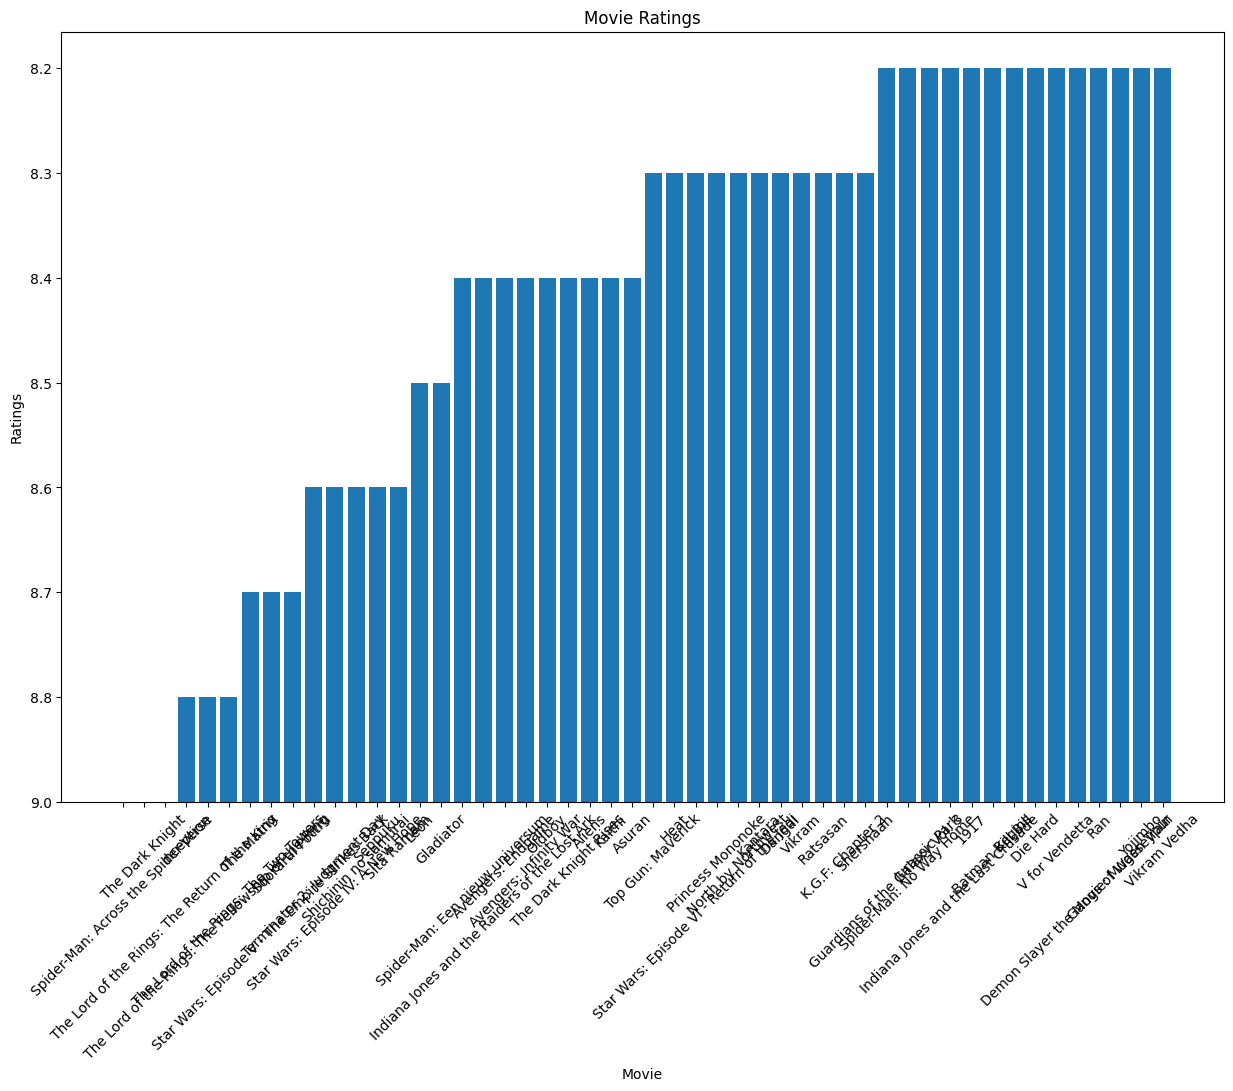

In [19]:
plt.figure(figsize=(15, 10))
plt.bar(final_df['Movie Name_left'], final_df['Ratings'])
plt.xlabel('Movie')
plt.ylabel('Ratings')
plt.title('Movie Ratings')
plt.xticks(rotation=45)
plt.show()

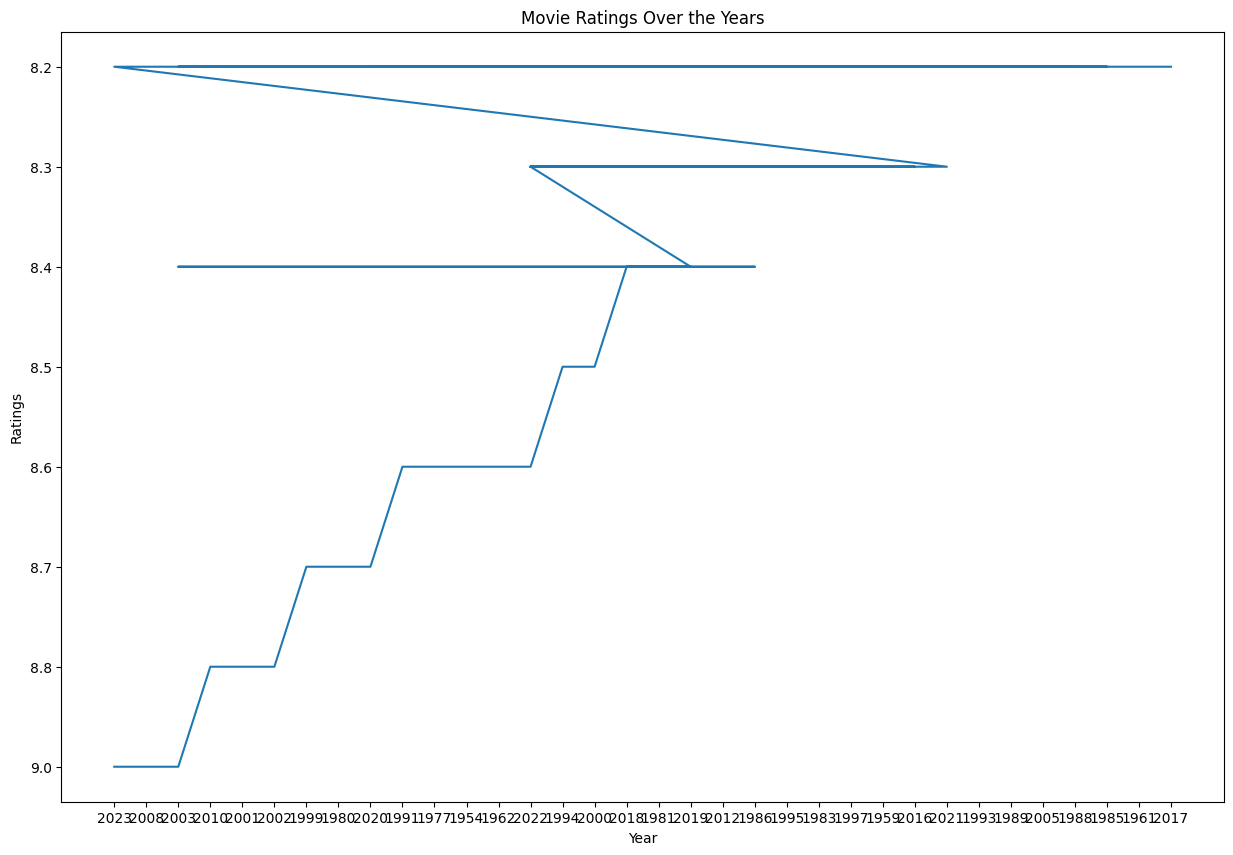

In [21]:
plt.figure(figsize=(15, 10))
plt.plot(final_df['Year'], final_df['Ratings'])
plt.xlabel('Year')
plt.ylabel('Ratings')
plt.title('Movie Ratings Over the Years')
plt.show()

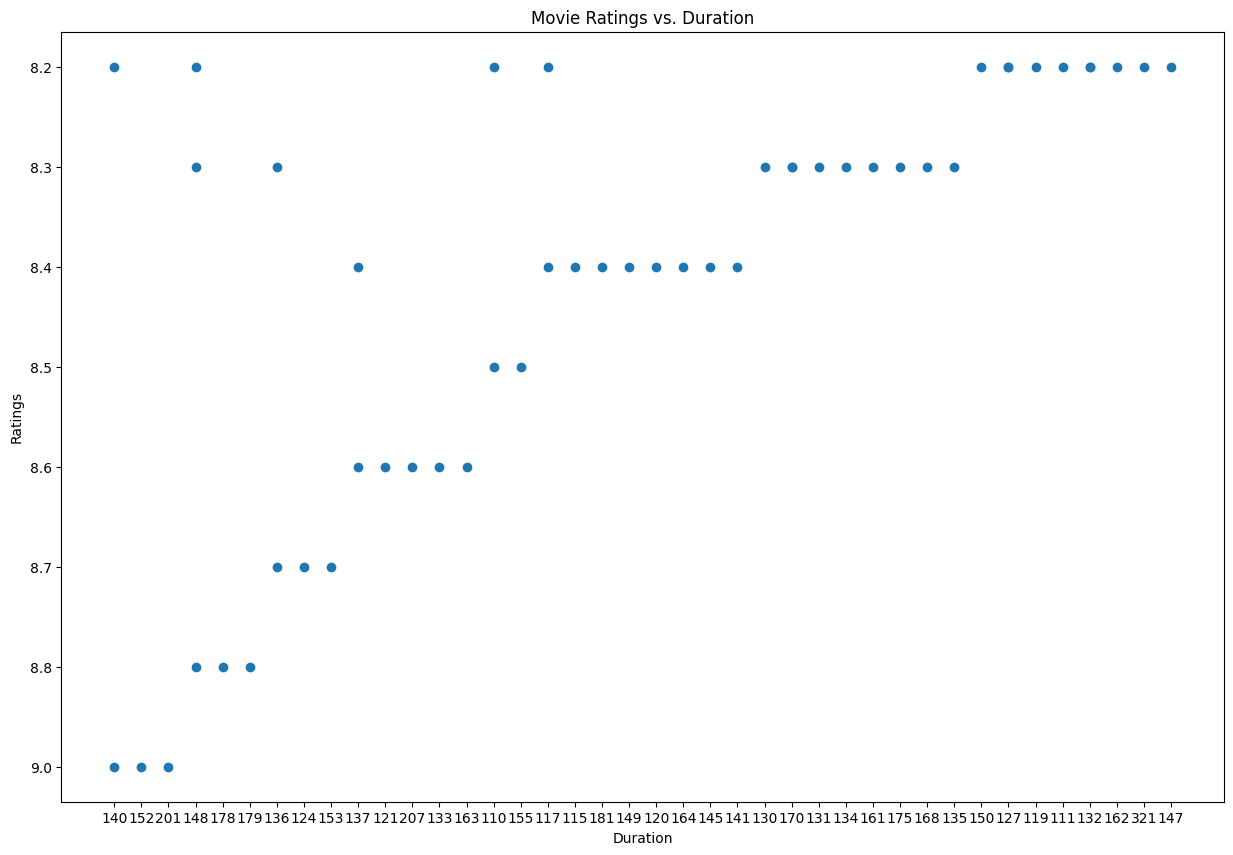

In [22]:
plt.figure(figsize=(15, 10))
plt.scatter(final_df['Duration'], final_df['Ratings'])
plt.xlabel('Duration')
plt.ylabel('Ratings')
plt.title('Movie Ratings vs. Duration')
plt.show()

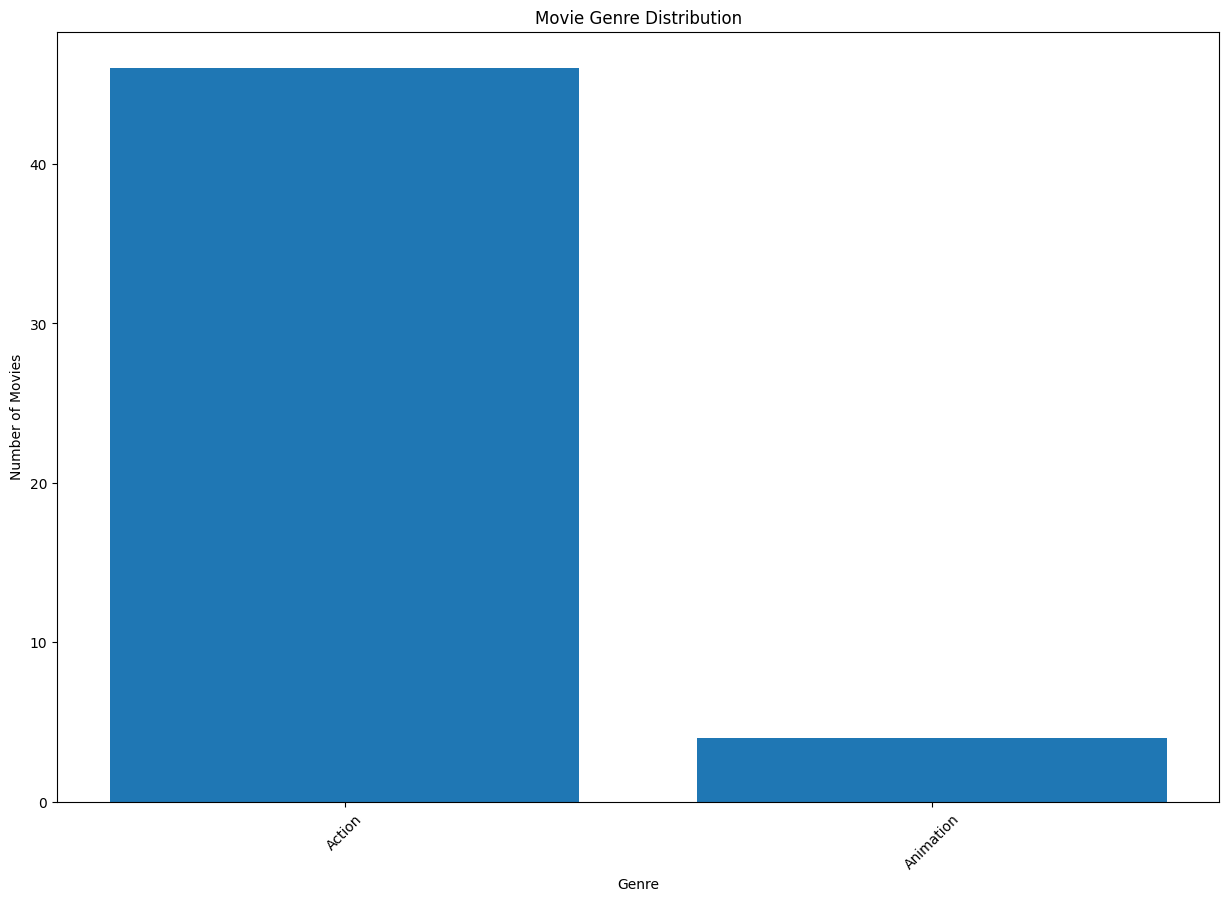

In [26]:
genre_counts = final_df['Genre1'].value_counts()
plt.figure(figsize=(15,10))
plt.bar(genre_counts.index, genre_counts.values)
plt.xlabel('Genre')
plt.ylabel('Number of Movies')
plt.title('Movie Genre Distribution')
plt.xticks(rotation=45)
plt.show()

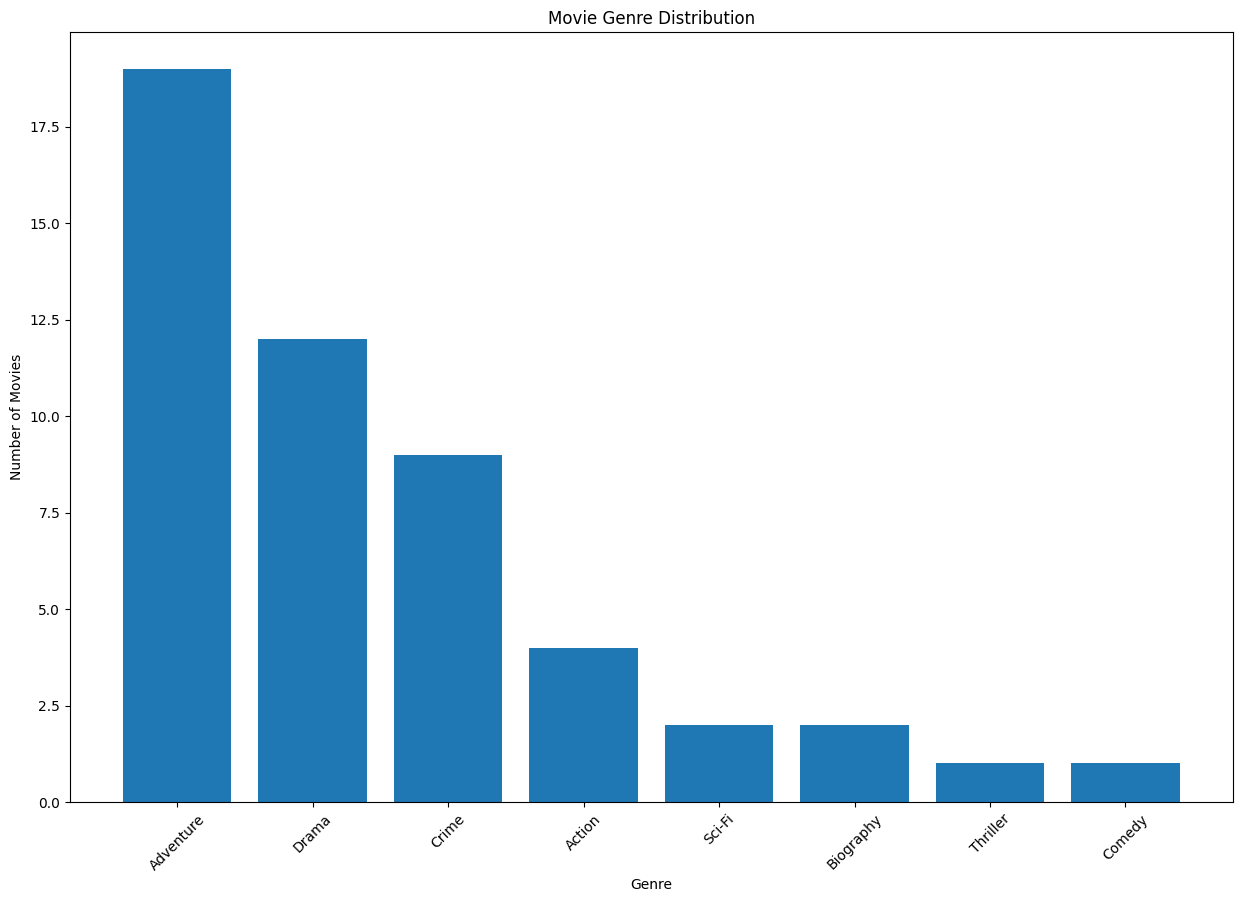

In [27]:
genre_counts = final_df['Genre2'].value_counts()
plt.figure(figsize=(15,10))
plt.bar(genre_counts.index, genre_counts.values)
plt.xlabel('Genre')
plt.ylabel('Number of Movies')
plt.title('Movie Genre Distribution')
plt.xticks(rotation=45)
plt.show()

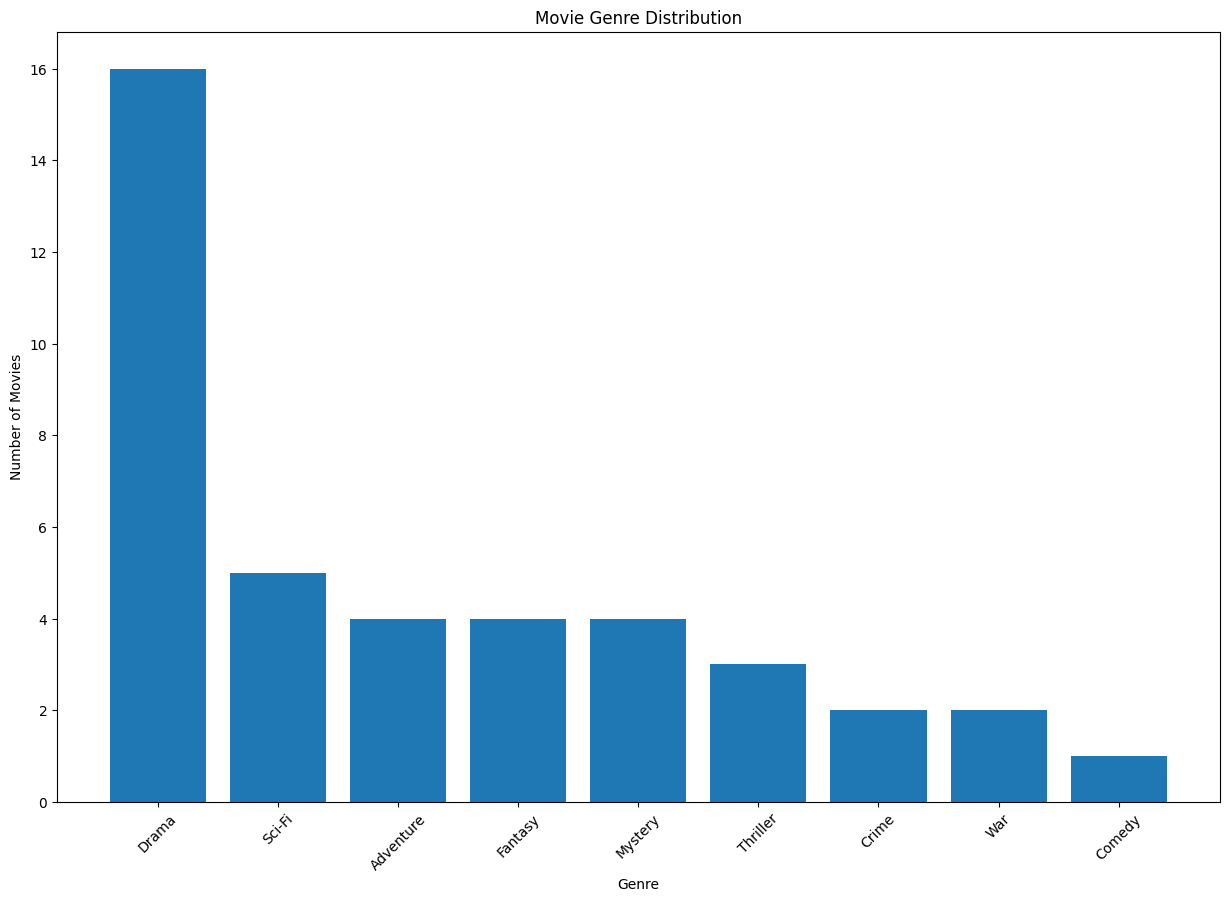

In [28]:
genre_counts = final_df['Genre3'].value_counts()
plt.figure(figsize=(15,10))
plt.bar(genre_counts.index, genre_counts.values)
plt.xlabel('Genre')
plt.ylabel('Number of Movies')
plt.title('Movie Genre Distribution')
plt.xticks(rotation=45)
plt.show()

<ipython-input-30-1463abbfa192>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = final_df[['Ratings', 'Duration', 'Metascore']].corr()
<ipython-input-30-1463abbfa192>:3: UserWarning: Attempting to set identical low and high xlims makes transformation singular; automatically expanding.
  plt.imshow(correlation_matrix, cmap='coolwarm', interpolation='nearest')
<ipython-input-30-1463abbfa192>:3: UserWarning: Attempting to set identical low and high ylims makes transformation singular; automatically expanding.
  plt.imshow(correlation_matrix, cmap='coolwarm', interpolation='nearest')


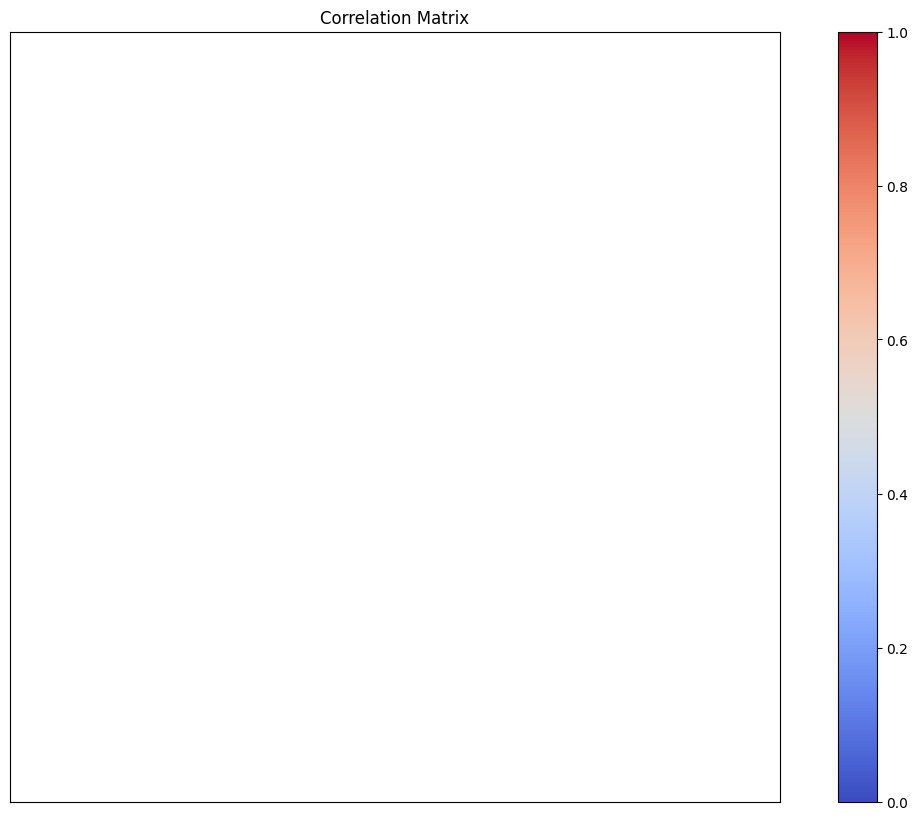

In [30]:
correlation_matrix = final_df[['Ratings', 'Duration', 'Metascore']].corr()
plt.figure(figsize=(15, 10))
plt.imshow(correlation_matrix, cmap='coolwarm', interpolation='nearest')
plt.colorbar()
plt.xticks(range(correlation_matrix.shape[0]), correlation_matrix.columns, rotation=45)
plt.yticks(range(correlation_matrix.shape[1]), correlation_matrix.columns)
plt.title('Correlation Matrix')
plt.show()

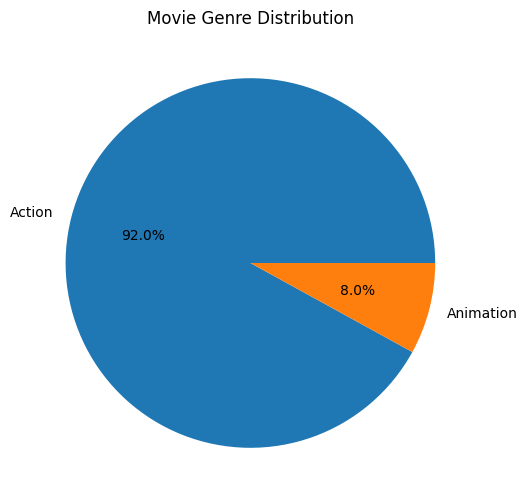

In [32]:
genre_counts = final_df['Genre1'].value_counts()
plt.figure(figsize=(10, 6))
plt.pie(genre_counts, labels=genre_counts.index, autopct='%1.1f%%')
plt.title('Movie Genre Distribution')
plt.show()

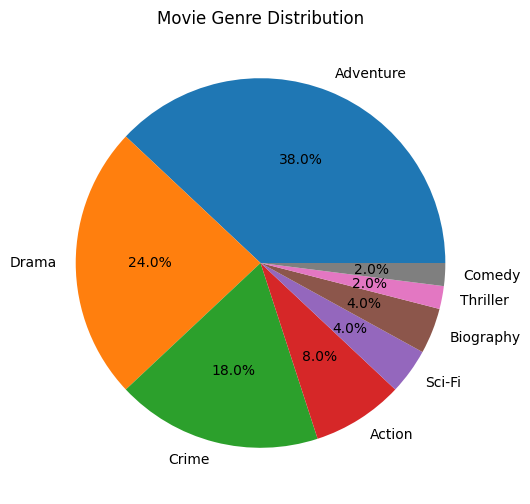

In [33]:
genre_counts = final_df['Genre2'].value_counts()
plt.figure(figsize=(10, 6))
plt.pie(genre_counts, labels=genre_counts.index, autopct='%1.1f%%')
plt.title('Movie Genre Distribution')
plt.show()

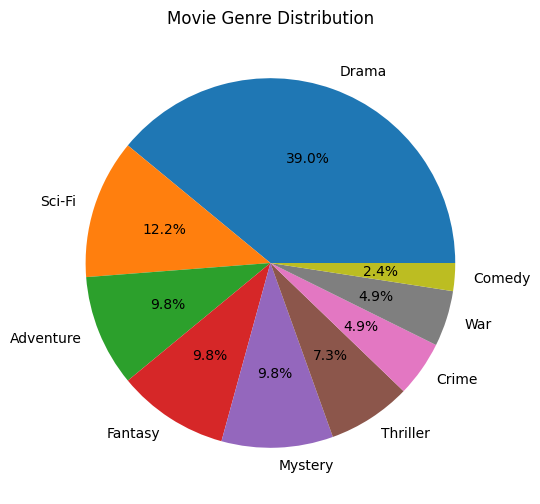

In [34]:
genre_counts = final_df['Genre3'].value_counts()
plt.figure(figsize=(10, 6))
plt.pie(genre_counts, labels=genre_counts.index, autopct='%1.1f%%')
plt.title('Movie Genre Distribution')
plt.show()

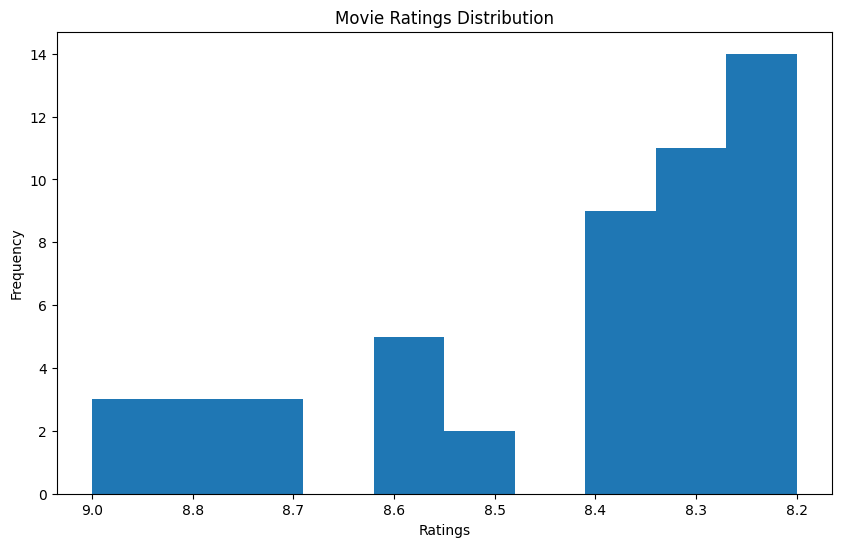

In [36]:
plt.figure(figsize=(10, 6))
plt.hist(final_df['Ratings'], bins=10)
plt.xlabel('Ratings')
plt.ylabel('Frequency')
plt.title('Movie Ratings Distribution')
plt.show()

# Phase - 4 - Prediction

In [109]:
# Dropping Null Values
final_df.dropna(inplace = True)
final_df = final_df.replace("N/A" , 0)
final_df = final_df.replace('AL' , 0)

In [113]:
# Changing Object data type to int
final_df['Certification'] = final_df['Certification'].astype("int")
final_df['Popularity'] = final_df['Popularity'].astype("int")
final_df['Duration'] = final_df['Duration'].astype("int")
final_df['Ratings'] = final_df['Ratings'].astype("int")

In [114]:
# Changing Strings to digits
lr = LabelEncoder()
final_df['Movie Name_left'] = lr.fit_transform(final_df['Movie Name_left'])
final_df["Director2"] = lr.fit_transform(final_df["Director2"])
final_df["Director1"] = lr.fit_transform(final_df["Director1"])
final_df["Director3"] = lr.fit_transform(final_df["Director3"])
final_df["Director4"] = lr.fit_transform(final_df["Director4"])
final_df["Director5"] = lr.fit_transform(final_df["Director5"])
final_df["Director6"] = lr.fit_transform(final_df["Director6"])
final_df["Director7"] = lr.fit_transform(final_df["Director7"])
final_df["Movie Name_right"] = lr.fit_transform(final_df["Movie Name_right"])
final_df["Star1"] = lr.fit_transform(final_df["Star1"])
final_df["Star2"] = lr.fit_transform(final_df["Star2"])
final_df["Star3"] = lr.fit_transform(final_df["Star3"])
final_df["Star4"] = lr.fit_transform(final_df["Star4"])
final_df["Star5"] = lr.fit_transform(final_df["Star5"])
final_df["Star6"] = lr.fit_transform(final_df["Star6"])
final_df["Star7"] = lr.fit_transform(final_df["Star7"])
final_df["Genre1"] = lr.fit_transform(final_df["Genre1"])
final_df["Genre2"] = lr.fit_transform(final_df["Genre2"])
final_df["Genre3"] = lr.fit_transform(final_df["Genre3"])
final_df["Gross Collection"] = lr.fit_transform(final_df["Gross Collection"])

In [123]:
# Changing Votes colum to int
final_df['Votes'] = pd.to_numeric(final_df['Votes'], errors='coerce')
final_df['Votes'] = final_df['Votes'].fillna(0)
final_df['Votes'] = final_df['Votes'].astype(int)

In [124]:
# Vote Prediction

vote_features = final_df.drop("Votes",axis = 1)
vote_labels = final_df['Votes']

vote_features_train, vote_features_test, vote_labels_train, vote_labels_test = train_test_split(vote_features, vote_labels, test_size=0.2, random_state=42)

rf_model_vote = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model_vote.fit(vote_features_train, vote_labels_train)

vote_predictions = rf_model_vote.predict(vote_features_test)

vote_mse = mean_squared_error(vote_labels_test, vote_predictions)
print("Vote MSE:", vote_mse)

Vote MSE: 0.0


In [125]:
# Gross Collection Prediction

gross_features = final_df.drop("Gross Collection",axis = 1)
gross_labels = final_df['Gross Collection']

gross_features_train, gross_features_test, gross_labels_train, gross_labels_test = train_test_split(gross_features, gross_labels, test_size=0.2, random_state=42)

lr_model_gross = LinearRegression()
lr_model_gross.fit(gross_features_train, gross_labels_train)

gross_predictions = lr_model_gross.predict(gross_features_test)

gross_mse = mean_squared_error(gross_labels_test, gross_predictions)
print("Gross Collection MSE:", gross_mse)

Gross Collection MSE: 0.0
